# Portfolio Porject - Predicting The Weather Using Machine Learning

### Introduction

In this Project I will predict weather by using Machine Learning. I done by a dataset from a station on Oakland International Airport from 1960 to 2021.

Each row in dataset represents one day, and each column is an individual measurement.

### Analyzing and preparing the data

In [1]:
# Reading in the initial data

import pandas as pd


weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [2]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [3]:
# Quick recap what data are and how many is missing.

weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  16859 non-null  object 
 1   NAME     16859 non-null  object 
 2   ACMH     5844 non-null   float64
 3   ACSH     5844 non-null   float64
 4   AWND     8051 non-null   float64
 5   DAPR     8 non-null      float64
 6   FMTM     2190 non-null   float64
 7   FRGT     2 non-null      float64
 8   MDPR     8 non-null      float64
 9   PGTM     8512 non-null   float64
 10  PRCP     16578 non-null  float64
 11  SNOW     11380 non-null  float64
 12  SNWD     11504 non-null  float64
 13  TAVG     2037 non-null   float64
 14  TMAX     16850 non-null  float64
 15  TMIN     16849 non-null  float64
 16  TSUN     1151 non-null   float64
 17  WDF1     5844 non-null   float64
 18  WDF2     8052 non-null   float64
 19  WDF5     7965 non-null   float64
 20  WDFG     4267 non-null   float64
 21  WSF

According to the domain knowledge we necessary for the following columns now:

- `PRCP`: total precipitation
- `TMAX`: maximum daily temperature
- `TMIN`: minimum daily temperature
- `SNOW`: the total daily snowfall
- `SNWD`: total snow depth on the ground

So, I reduced the dataset to this columns. After it I investigated the percentage of missing values.

In [4]:
core_columns = ["PRCP", "TMAX", "TMIN", "SNOW", "SNWD"]

weather[core_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    16578 non-null  float64
 1   TMAX    16850 non-null  float64
 2   TMIN    16849 non-null  float64
 3   SNOW    11380 non-null  float64
 4   SNWD    11504 non-null  float64
dtypes: float64(5)
memory usage: 790.3+ KB


In [5]:
missing_values = pd.DataFrame({
    "features": core_columns,
    "missing values (%)": round((weather[core_columns].isnull().sum() / weather.shape[0]) * 100, 2)
})

missing_values.reset_index(drop=True, inplace=True)
missing_values

,features,missing values (%)
0,PRCP,1.67
1,TMAX,0.05
2,TMIN,0.06
3,SNOW,32.50
4,SNWD,31.76


In [6]:
# Creating a new dataset based on the necessary columns

observations = pd.DataFrame()
observations = weather[core_columns]

observations

,PRCP,TMAX,TMIN,SNOW,SNWD
DATE,,,,,
1960-01-01,0.0,49.0,30.0,0.0,0.0
1960-01-02,0.0,49.0,29.0,0.0,0.0
1960-01-03,0.0,54.0,35.0,0.0,0.0
1960-01-04,0.0,54.0,36.0,0.0,0.0
1960-01-05,0.0,55.0,33.0,0.0,0.0
...,...,...,...,...,...
2022-01-24,0.0,60.0,39.0,NaN,NaN
2022-01-25,0.0,57.0,43.0,NaN,NaN
2022-01-26,0.0,57.0,41.0,NaN,NaN


I can see that the columns `SNOW` and `SNWD` have a high amount of missing values (roughly 30%). So I have investigated that ones at first.

In [7]:
observations[["SNOW", "SNWD"]].describe()

,SNOW,SNWD
count,11380.000000,11504.0
mean,0.000088,0.0
std,0.009374,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,0.000000,0.0
max,1.000000,0.0


In [8]:
observations["SNOW"].value_counts()

SNOW
0.0    11379
1.0        1
Name: count, dtype: int64

In [9]:
observations["SNWD"].value_counts()

SNWD
0.0    11504
Name: count, dtype: int64

Based on the two columns above I found that they don't carry any useful information. Thus, I dropped that ones.

In [10]:
observations = observations.drop(columns=["SNOW", "SNWD"], axis=1)

The other three columns shows that there are a few missing values. So I also investigated them deeper and I have tried fill in them an appropriate value.

But first I checked if there any value `9999` in any columns which indicates that there was a measuring error. It must be to replace with an `NaN` value to simple fill in with an appropriate value later.

In [11]:
filter = ((observations["PRCP"] == 9999) | \
         (observations["TMIN"] == 9999) | \
         (observations["TMAX"] == 9999))

print(f"Number of observations where countaining value '9999' is: {len(observations[filter])}")

Number of observations where countaining value '9999' is: 0


In [12]:
import numpy as np


pd.options.mode.copy_on_write = True # For Warning message in Jupyter

observations["PRCP"] = observations["PRCP"].fillna(observations["PRCP"].mean())

In [13]:
"""
Because of temperature is tight related with previous and afterward days, 
I used the KNNImputer to fill in based on them not by the mean all value on column.
"""

from sklearn.impute import KNNImputer


imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)

observations["TMIN"] = imputer.fit_transform(observations[["TMIN"]])
observations["TMAX"] = imputer.fit_transform(observations[["TMAX"]])

At now, the dataset contains no missing values, and they are numerical type.

In [14]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    16859 non-null  float64
 1   TMAX    16859 non-null  float64
 2   TMIN    16859 non-null  float64
dtypes: float64(3)
memory usage: 1.0+ MB


In [15]:
# To ensure that index store the date information in datetime format

observations.index = pd.to_datetime(observations.index)

### Analyzing Weather Data

First, I have analysed the column `TMIN` and `TMAX`.

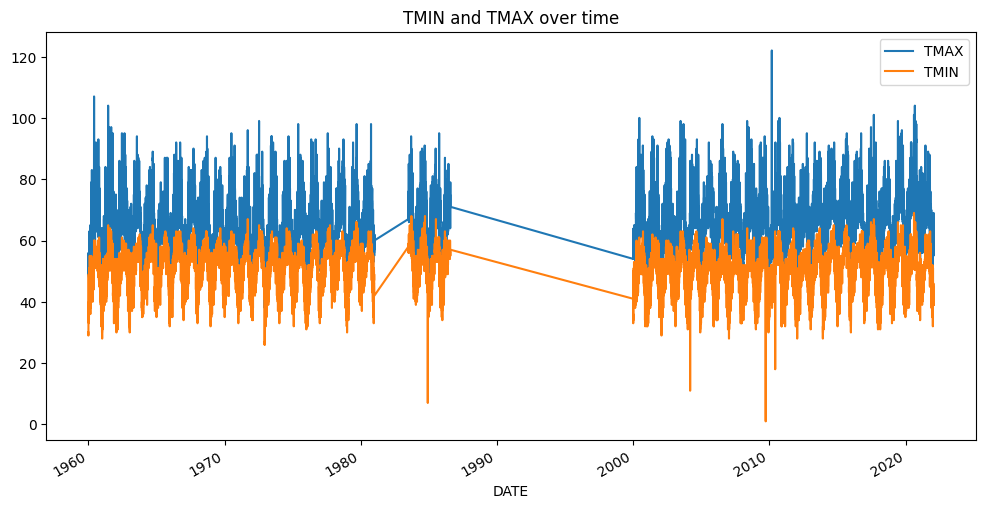

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(12, 6))

plt.title("TMIN and TMAX over time")

observations["TMAX"].plot()
observations["TMIN"].plot()

plt.legend()

plt.show()

After it, plotting the `Precipitation` over time.

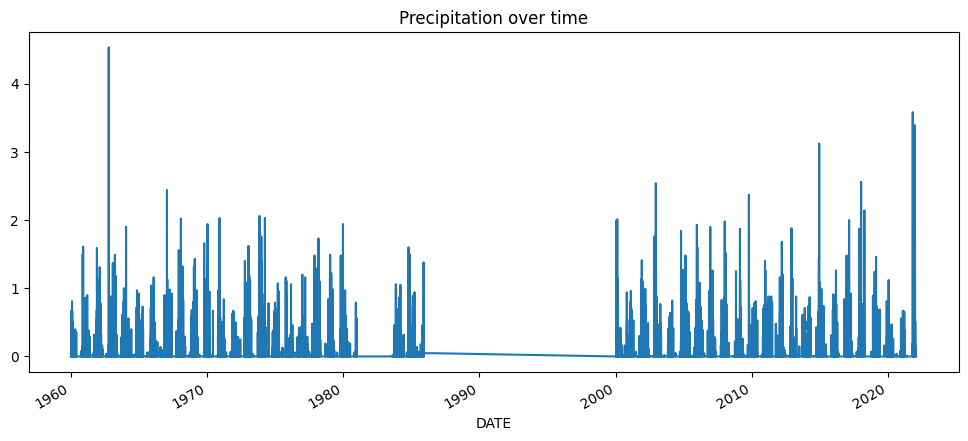

In [17]:
plt.figure(figsize=(12, 5))

plt.title("Precipitation over time")

observations["PRCP"].plot()

plt.show()

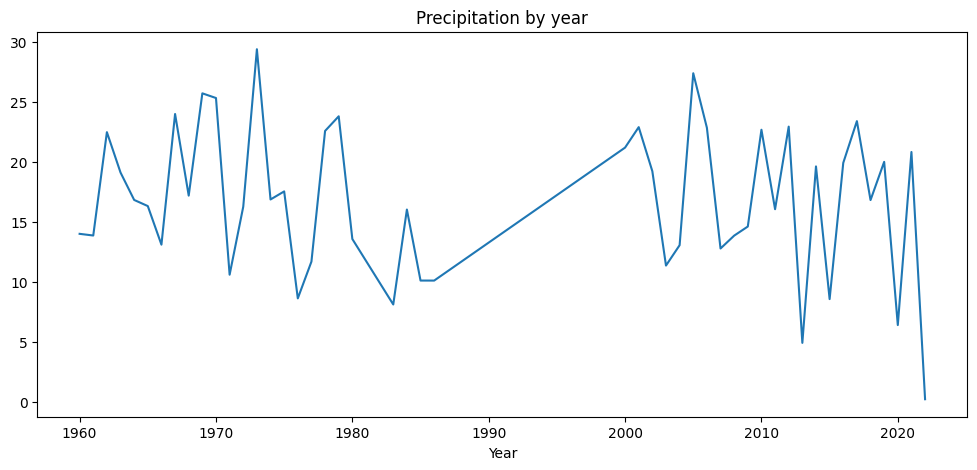

In [18]:
observations["Year"] = pd.DatetimeIndex(observations.index).year # Extracting year from index for grouping by them

observations_by_year = observations.groupby("Year").sum()

plt.figure(figsize=(12, 5))
plt.title("Precipitation by year")

observations_by_year["PRCP"].plot()

plt.show()

observations.drop("Year", axis=1, inplace=True) # Removing de column Year, because it is not needed anymore

Note: There are some missing data that has caused by many reason. For example malfunctioned sensors, measuring error, synchronization problem, etc.

### Training an Initial Model

In [19]:
#import warning


#warning.simplefilter(action='ignore', category=FutureWarning)

In [20]:
# Creating the target column: which shows the highest temperature (TMAX) on next day 

observations["NEXT_DAY_MAX"] = 0.0 # Initializing the target column

for index in range(0, observations.shape[0]-1):
    
    # Adding the value from next row's (next day) column TMAX (number 1 column) to the target one (number 3)
    
    observations.iloc[index, 3] = observations.iloc[index+1, 1]

In [21]:
observations

,PRCP,TMAX,TMIN,NEXT_DAY_MAX
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [22]:
# I removed the last row because there isn't next day

observations.drop(index=observations.index[-1], axis=0, inplace=True)

In [23]:
from sklearn.linear_model import Ridge


model = Ridge()

In [24]:
# Creating the training and test sets

from sklearn.model_selection import train_test_split


X = observations.iloc[:, :-1]
y = observations["NEXT_DAY_MAX"]

# The order of rows in splitting is important due to time series nature of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42, shuffle=False)

model.fit(X_train, y_train)

Ridge()

### Measuring Accuracy

In [25]:
predicts = model.predict(X_test)

In [26]:
from sklearn.metrics import r2_score


score = r2_score(y_test, predicts)
score

0.37383275456980447

In [27]:
predictions = pd.DataFrame({"Actual": y_test,
                            "Predict": predicts
                           })

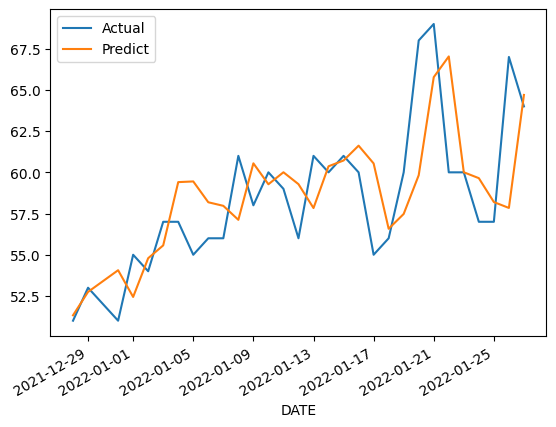

In [28]:
predictions.plot()

plt.show()

For the first initial model the result of accuracy roughly 37%. Unfortunately it doesn't sounds good. The diagram showing too.

### Building a Prediction Function

In this section I have created a single function which doing all tasks which I did earlier. For example, splitting the dataset, training a model and making predictions. With this function I will get a simple DataFrame and the actual accuracy. The DataFrame contains the actual and predicted values. 

In [29]:
def making_predictions(model, observations, target_column, test_size=30):
    
    """
    Making predictions based on the observations and a given model

    Parameters:
    model (sklearn.linear_model): The instantiated model which will be train and creating the predictions by
    observations (pandas.core.frame.DataFrame): The DataFrame that contans the historical data 
    target_column (str): The column name which will be the target feature
    test_size (int): How many percent will be allocated for test dataset 
    
    Returns:
    tuple: The predictions: Dataset with actual values and predictions in DataFrame and the  accuracy score of model
    """
    
    X = observations.drop(target_column, axis=1)
    y = observations[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=False)
    
    model = model
    model.fit(X_train, y_train)
    
    predicts = model.predict(X_test)
    
    score = r2_score(y_test, predicts)
    
    result_dataframe = pd.DataFrame({"Actual": y_test,
                                     "Predict": predicts        
                                    })
    
    return result_dataframe, score

### Adding in Rolling Means

To improve the accuracy I have added some extra predictors to the model, as rolling mean. It covers the previous 30 days' temperature. It means a higher temperature on a day is would be recognizable as a non seasonable temperature. 

The two other columns represent the ratio of average temperature and the extremes.

In [30]:
observations["AVG_TEMP"] = (observations["TMIN"] + observations["TMAX"]) / 2

In [31]:
observations["ROLLING_TEMP_30DAYS"] = observations["AVG_TEMP"].rolling(30).mean()

In [32]:
observations["RATIO_MIN"] = observations["AVG_TEMP"] / observations["TMIN"]
observations["RATIO_MAX"] = observations["AVG_TEMP"] / observations["TMAX"]

In [33]:
observations = observations[29:] # Skipping the first 30 rows due to rolling mean. The first 30 value are NaN.

In [34]:
observations

,PRCP,TMAX,TMIN,NEXT_DAY_MAX,AVG_TEMP,ROLLING_TEMP_30DAYS,RATIO_MIN,RATIO_MAX
DATE,,,,,,,,
1960-01-30,0.00,61.0,49.0,59.0,55.0,48.533333,1.122449,0.901639
1960-01-31,0.00,59.0,46.0,62.0,52.5,48.966667,1.141304,0.889831
1960-02-01,0.81,62.0,51.0,59.0,56.5,49.550000,1.107843,0.911290
1960-02-02,0.00,59.0,43.0,59.0,51.0,49.766667,1.186047,0.864407
1960-02-03,0.20,59.0,47.0,60.0,53.0,50.033333,1.127660,0.898305
...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,50.5,49.850000,1.231707,0.841667
2022-01-24,0.00,60.0,39.0,57.0,49.5,49.750000,1.269231,0.825000
2022-01-25,0.00,57.0,43.0,57.0,50.0,49.783333,1.162791,0.877193


In [35]:
# Re-run the model training and evaluation with same model and refreshed dataset

second_model_results = making_predictions(model, observations, "NEXT_DAY_MAX")

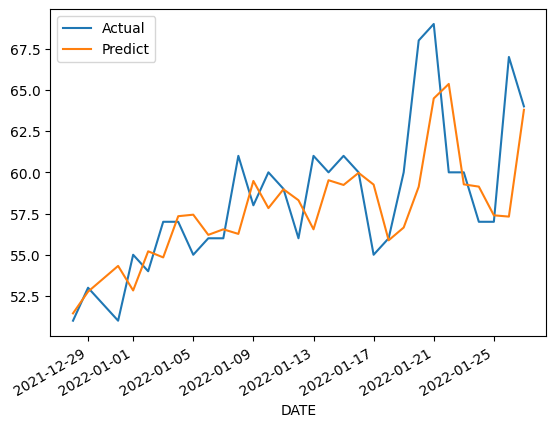

In [36]:
second_model_results[0].plot() # The first element of tuple contains the predictions-actual values dataset
plt.show()

In [37]:
second_model_results[1] # Accuracy of model at second time. The second element is the accuracy score.

0.39841398458742916

It seems add in a few extra predictors helps improving the accuracy with 2% compare of the first. From roughly 37% to 39%.

### Conclusion and next steps

In this project, I worked with a dataset about the Oakland International Airport weather.

The goal was predicting the temperature on the next day based on the historical data. I focused primary on preparing the data and add in some extra columns to improving the model.

The model is pretty poor now. In the next step it should be improve by add in more features, or to staying more columns from original dataset. Moreover tuning the parameters of model or using complete another model than Ridge.